In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly_express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('New and Condensed Dataset Columns Not Null.csv')

In [4]:
len(df)

288762

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,Source,TMC,Severity,Start_Time,End_Time,Time_Elapsed_From_Accident(Seconds),Time_Elapsed_From_Accident(Minutes),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Twilight
0,0,0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,18840,314.0,...,No,No,No,No,No,Night,Night,Night,Night,Night
1,1,10,A-11,MapQuest,201.0,3,2016-02-08 08:14:42,2016-02-08 08:44:42,1800,30.0,...,No,No,No,No,No,Day,Day,Day,Day,Day
2,2,20,A-21,MapQuest,201.0,2,2016-02-08 10:11:15,2016-02-08 10:41:15,1800,30.0,...,No,No,No,No,No,Day,Day,Day,Day,Day
3,3,30,A-31,MapQuest,201.0,2,2016-02-08 16:16:08,2016-02-08 16:46:08,1800,30.0,...,No,No,No,Yes,No,Day,Day,Day,Day,Day
4,4,40,A-41,MapQuest,201.0,2,2016-02-09 05:40:57,2016-02-09 06:10:57,1800,30.0,...,No,No,No,No,No,Night,Night,Night,Night,Night


In [6]:
df['City'].value_counts()[:10]

Houston          9085
Charlotte        6776
Los Angeles      6465
Dallas           5769
Austin           5747
Raleigh          3885
Atlanta          3781
Miami            3101
Oklahoma City    3087
Baton Rouge      3035
Name: City, dtype: int64

In [7]:
df_dallas_tx = df[(df['City'] == "Dallas") & (df['State'] == 'TX')]

In [8]:
len(df_dallas_tx)

5749

In [9]:
df_dallas_tx['Severity'].value_counts()

2    3562
3    2143
4      41
1       3
Name: Severity, dtype: int64

In [10]:
df_dallas_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5749 entries, 25204 to 288530
Data columns (total 65 columns):
Unnamed: 0                             5749 non-null int64
Unnamed: 0.1                           5749 non-null int64
ID                                     5749 non-null object
Source                                 5749 non-null object
TMC                                    4751 non-null float64
Severity                               5749 non-null int64
Start_Time                             5749 non-null object
End_Time                               5749 non-null object
Time_Elapsed_From_Accident(Seconds)    5749 non-null int64
Time_Elapsed_From_Accident(Minutes)    5749 non-null float64
Month                                  5749 non-null object
Year                                   5749 non-null int64
Start Date                             5749 non-null object
End Date                               5749 non-null object
Start Time                             5749 non-nu

In [11]:
df_dallas_tx.groupby(['Latitude', 'Longitude']).size().sort_values(ascending=False)[:10]

Latitude   Longitude 
32.909061  -96.732216    29
32.885582  -96.700478    29
32.794098  -96.699883    27
32.894493  -96.711494    27
32.766403  -96.914665    25
32.778790  -96.782021    24
32.924530  -96.786148    24
32.923908  -96.764305    23
32.874687  -96.683182    22
32.900307  -96.717690    21
dtype: int64

In [12]:
df_dallas_tx[df_dallas_tx['Latitude'] == 32.909061]['Longitude'].value_counts()

-96.732216    29
Name: Longitude, dtype: int64

In [13]:
df_dallas_tx[df_dallas_tx['Latitude'] == 32.909061]['Street'].value_counts()

LBJ Fwy E    29
Name: Street, dtype: int64

In [14]:
df_dallas_tx[df_dallas_tx['Latitude'] == 32.909061].iloc[0]

Unnamed: 0                                                                         26590
Unnamed: 0.1                                                                      265900
ID                                                                              A-265902
Source                                                                          MapQuest
TMC                                                                                  201
Severity                                                                               3
Start_Time                                                           2016-12-21 08:51:22
End_Time                                                             2016-12-21 09:20:53
Time_Elapsed_From_Accident(Seconds)                                                 1771
Time_Elapsed_From_Accident(Minutes)                                              29.5167
Month                                                                            2016-12
Year                 

In [15]:
df_dallas_tx[(df_dallas_tx['Latitude'] == 32.909061) & (df_dallas_tx['Street'] == 'LBJ Fwy E')].groupby(['Day Of Week', 'Start Hour']).size().sort_values(ascending=False)[:10]

Day Of Week  Start Hour
Thursday     17            2
Monday       5             2
Saturday     13            2
Wednesday    9             1
Monday       19            1
Friday       6             1
             14            1
             21            1
             22            1
Monday       7             1
dtype: int64

In [16]:
df[df['Start Hour'] == 17]['Part_Of_Day'].value_counts()

Evening    21676
Name: Part_Of_Day, dtype: int64

In [17]:
print(df_dallas_tx[df_dallas_tx['Start Hour'] == 17]['Sunrise_Sunset'].value_counts())
print(df_dallas_tx[df_dallas_tx['Start Hour'] == 17]['Civil_Twilight'].value_counts())
print(df_dallas_tx[df_dallas_tx['Start Hour'] == 17]['Nautical_Twilight'].value_counts())
print(df_dallas_tx[df_dallas_tx['Start Hour'] == 17]['Astronomical_Twilight'].value_counts())

Day      346
Night     48
Name: Sunrise_Sunset, dtype: int64
Day      380
Night     14
Name: Civil_Twilight, dtype: int64
Day    394
Name: Nautical_Twilight, dtype: int64
Day    394
Name: Astronomical_Twilight, dtype: int64


In [18]:
# Making Machine Learning models to Predict Severity of Accidents

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [21]:
feature_columns = ['Latitude', 'Longitude', 'Season', 'Part_Of_Day', 'Start Hour', 'Day Of Week', 'Street', 'County', 'Zipcode',
                'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition',
                'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 
                'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
                'Nautical_Twilight', 'Astronomical_Twilight']
target_col = 'Severity'
df_dallas_tx_model = df_dallas_tx[feature_columns]
df_dallas_tx_model_dummy = pd.get_dummies(df_dallas_tx_model, drop_first=True)
X = df_dallas_tx_model_dummy
y = df_dallas_tx[target_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [22]:
df_dallas_tx_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5749 entries, 25204 to 288530
Data columns (total 30 columns):
Latitude                 5749 non-null float64
Longitude                5749 non-null float64
Season                   5749 non-null object
Part_Of_Day              5749 non-null object
Start Hour               5749 non-null int64
Day Of Week              5749 non-null object
Street                   5749 non-null object
County                   5749 non-null object
Zipcode                  5749 non-null object
Temperature(F)           5749 non-null float64
Humidity(%)              5749 non-null float64
Pressure(in)             5749 non-null float64
Visibility(mi)           5749 non-null float64
Weather_Condition        5749 non-null object
Amenity                  5749 non-null object
Bump                     5749 non-null object
Crossing                 5749 non-null object
Give_Way                 5749 non-null object
Junction                 5749 non-null object
No_Exit 

In [23]:
df_dallas_tx_model_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5749 entries, 25204 to 288530
Columns: 1765 entries, Latitude to Astronomical_Twilight_Night
dtypes: float64(6), int64(1), uint8(1758)
memory usage: 10.0 MB


In [24]:
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

[[772 121   0]
 [201 335   0]
 [  3   6   0]]

             precision    recall  f1-score   support

          2       0.79      0.86      0.83       893
          3       0.73      0.62      0.67       536
          4       0.00      0.00      0.00         9

avg / total       0.76      0.77      0.76      1438


Random Forest Classifier Accuracy: 76.98191933240612%


Top 10 Most Important Features: 

              Feature  Importance
0            Latitude    0.066875
1           Longitude    0.060844
2  Traffic_Signal_Yes    0.057760
3         Humidity(%)    0.051581
4      Temperature(F)    0.049897
5        Pressure(in)    0.049799
6          Start Hour    0.042376
7        Crossing_Yes    0.021649
8      Visibility(mi)    0.018115
9      Street_I-635 W    0.015696



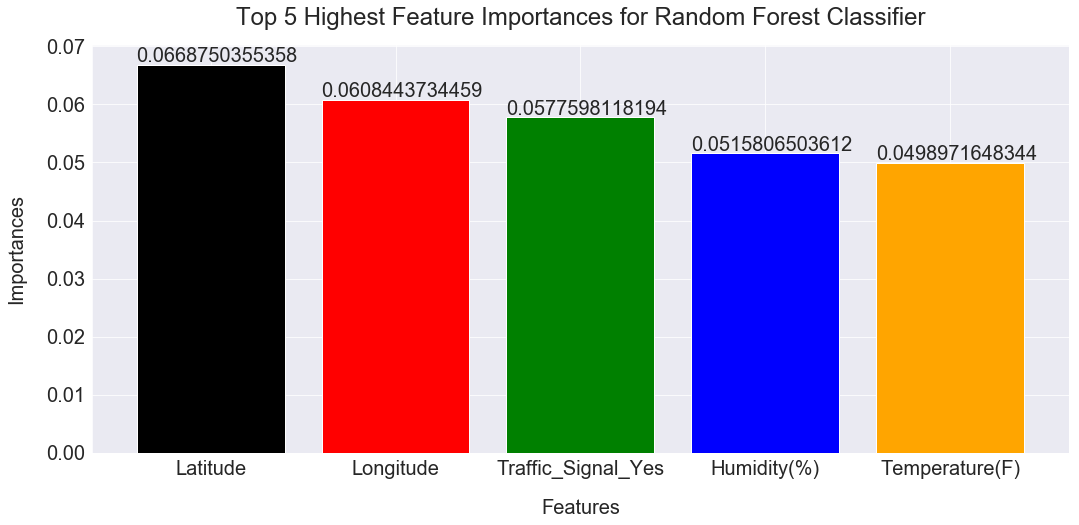

In [25]:
def randomForestClassifierFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    #train_X = sc.fit_transform(train_X)
    #test_X = sc.transform(test_X)
    clf = RandomForestClassifier(criterion='entropy', random_state = 0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    print(classification_report(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("Random Forest Classifier Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    print()
    df_feature_importances = pd.DataFrame(clf.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return clf, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Random Forest Classifier', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

rfc_regular, feature_importance_rfc_df = randomForestClassifierFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_rfc_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_rfc_df)

[[770 123   0]
 [130 406   0]
 [  3   6   0]]

             precision    recall  f1-score   support

          2       0.85      0.86      0.86       893
          3       0.76      0.76      0.76       536
          4       0.00      0.00      0.00         9

avg / total       0.81      0.82      0.82      1438


Random Forest Classifier with n_estimators = 100 Accuracy: 81.78025034770513%


Top 10 Most Important Features: 

              Feature  Importance
0            Latitude    0.067694
1           Longitude    0.059830
2        Pressure(in)    0.050496
3      Temperature(F)    0.049015
4         Humidity(%)    0.048988
5  Traffic_Signal_Yes    0.046930
6          Start Hour    0.041271
7        Crossing_Yes    0.020939
8      Visibility(mi)    0.018896
9      Street_I-635 W    0.015632



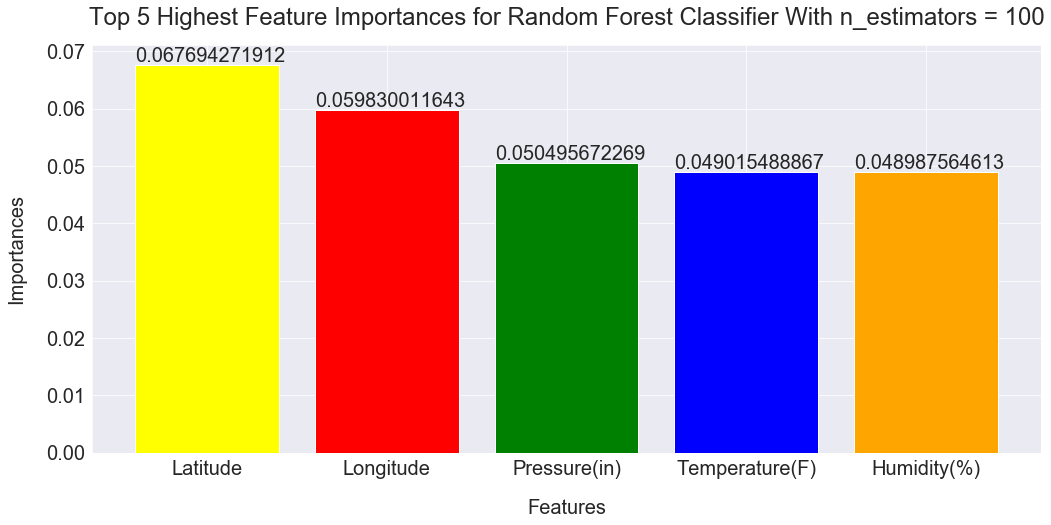

In [26]:
def randomForestClassifierNEstimatorsHundredFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    #train_X = sc.fit_transform(train_X)
    #test_X = sc.transform(test_X)
    clf = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state = 0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    print(classification_report(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("Random Forest Classifier with n_estimators = 100 Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    print()
    df_feature_importances = pd.DataFrame(clf.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return clf, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['yellow', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Random Forest Classifier With n_estimators = 100', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:14])
    plt.savefig('Feature Importances for Random Classifier with n_estimators = 100 Model.jpg')
    plt.show()
    return None

rfc_hundred, feature_importance_rfc_hundred_estimators_df = randomForestClassifierNEstimatorsHundredFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_rfc_hundred_estimators_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_rfc_hundred_estimators_df)

In [27]:
def logisticRegressionClassifierFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    #train_X = sc.fit_transform(train_X)
    #test_X = sc.transform(test_X)
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    print(classification_report(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("Logistic Regression Classifier Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    print()
    return clf

logisticRegressionClassifier = logisticRegressionClassifierFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features For Logistic Regression Model:')
print()
smf = SelectFromModel(logisticRegressionClassifier, threshold = -np.inf)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = df_dallas_tx_model_dummy.columns[feature_idx]
for i in feature_name[:10]:
    print(i)

[[756 137   0]
 [112 424   0]
 [  4   5   0]]

             precision    recall  f1-score   support

          2       0.87      0.85      0.86       893
          3       0.75      0.79      0.77       536
          4       0.00      0.00      0.00         9

avg / total       0.82      0.82      0.82      1438


Logistic Regression Classifier Accuracy: 82.05841446453408%


Top 10 Most Important Features For Logistic Regression Model:

Latitude
Longitude
Start Hour
Temperature(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Season_Spring
Season_Summer
Season_Winter


[[723 164   6]
 [140 391   5]
 [  5   4   0]]

             precision    recall  f1-score   support

          2       0.83      0.81      0.82       893
          3       0.70      0.73      0.71       536
          4       0.00      0.00      0.00         9

avg / total       0.78      0.77      0.78      1438


Decision Tree Classifier Accuracy: 77.46870653685674%


Top 10 Most Important Features: 

              Feature  Importance
0            Latitude    0.122355
1           Longitude    0.102934
2  Traffic_Signal_Yes    0.099698
3        Pressure(in)    0.085652
4         Humidity(%)    0.065640
5      Temperature(F)    0.056639
6          Start Hour    0.049416
7      Street_US-77 S    0.020431
8      Street_I-635 W    0.015297
9      Street_US-77 N    0.013705



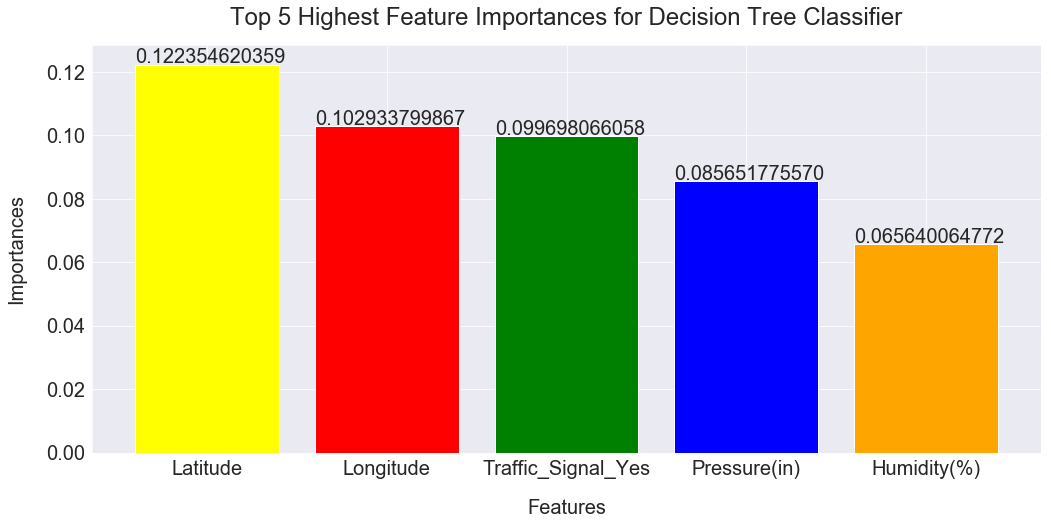

In [28]:
def decisionTreeClassifierFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    #train_X = sc.fit_transform(train_X)
    #test_X = sc.transform(test_X)
    clf = DecisionTreeClassifier(criterion='entropy', random_state = 0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    print(classification_report(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("Decision Tree Classifier Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    print()
    df_feature_importances = pd.DataFrame(clf.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return clf, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['yellow', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Decision Tree Classifier', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:14])
    #plt.savefig('Feature Importances for Decision Tree Classifier Model.jpg')
    plt.show()
    return None

dtc, feature_importance_dtc_df = decisionTreeClassifierFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_dtc_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_dtc_df)

In [29]:
def linearSVMClassifierFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    #train_X = sc.fit_transform(train_X)
    #test_X = sc.transform(test_X)
    clf = SVC(kernel='linear', random_state = 0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    print(classification_report(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("Linear Support Vector Machine Classifier Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    return clf

linearSVMClassifier = linearSVMClassifierFunction(X_train, X_test, y_train, y_test)

[[708 185   0]
 [ 74 462   0]
 [  2   7   0]]

             precision    recall  f1-score   support

          2       0.90      0.79      0.84       893
          3       0.71      0.86      0.78       536
          4       0.00      0.00      0.00         9

avg / total       0.82      0.81      0.81      1438


Linear Support Vector Machine Classifier Accuracy: 81.36300417246176%


In [30]:
def kernelSVMClassifierFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    train_X = sc.fit_transform(train_X)
    test_X = sc.transform(test_X)
    clf = SVC(kernel='rbf', random_state = 0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("Kernel Support Vector Machine Classifier Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    return None

kernelSVMClassifierFunction(X_train, X_test, y_train, y_test)

[[628 265   0]
 [ 82 454   0]
 [  2   7   0]]

Kernel Support Vector Machine Classifier Accuracy: 75.24339360222531%


In [31]:
def kNNClassifierFunction(train_X, test_X, train_y, test_y):
    sc = StandardScaler()
    #train_X = sc.fit_transform(train_X)
    #test_X = sc.transform(test_X)
    clf = KNeighborsClassifier()
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print(confusion_matrix(y_true = test_y, y_pred = predictions))
    print()
    total_same = 0
    for i in range(len(predictions)):
        if test_y.values[i] == predictions[i]:
            total_same += 1
    print("KNN (K=5) Classifier Accuracy: " + str((total_same/len(predictions)) * 100) + "%")
    return None

kNNClassifierFunction(X_train, X_test, y_train, y_test)

[[657 236   0]
 [364 172   0]
 [  2   7   0]]

KNN (K=5) Classifier Accuracy: 57.64951321279555%


In [32]:
# Predicting a value for Severity

In [33]:
"""
0: Latitude                 
1: Longitude                
2: Season                   
3: Part_Of_Day              
4: Start Hour               
5: Day Of Week              
6: Street                   
7: County                   
8: Zipcode                  
9: Temperature(F)           
10: Humidity(%)              
11: Pressure(in)             
12: Visibility(mi)           
13: Weather_Condition        
14: Amenity                  
15: Bump                     
16: Crossing                 
17: Give_Way                 
18: Junction                 
19: No_Exit                  
20: Railway                  
21: Roundabout               
22: Station                  
23: Stop                     
24: Traffic_Calming          
25: Traffic_Signal           
26: Sunrise_Sunset           
27: Civil_Twilight           
28: Nautical_Twilight        
29: Astronomical_Twilight    
"""

'\n0: Latitude                 \n1: Longitude                \n2: Season                   \n3: Part_Of_Day              \n4: Start Hour               \n5: Day Of Week              \n6: Street                   \n7: County                   \n8: Zipcode                  \n9: Temperature(F)           \n10: Humidity(%)              \n11: Pressure(in)             \n12: Visibility(mi)           \n13: Weather_Condition        \n14: Amenity                  \n15: Bump                     \n16: Crossing                 \n17: Give_Way                 \n18: Junction                 \n19: No_Exit                  \n20: Railway                  \n21: Roundabout               \n22: Station                  \n23: Stop                     \n24: Traffic_Calming          \n25: Traffic_Signal           \n26: Sunrise_Sunset           \n27: Civil_Twilight           \n28: Nautical_Twilight        \n29: Astronomical_Twilight    \n'

In [34]:
values_for_features = []
for i in feature_columns:
    values_for_features.append(df_dallas_tx[df_dallas_tx['Unnamed: 0'] == 26590][i].values[0])
values_for_features[2] = 'Spring'
values_for_features[3] = 'Evening'
values_for_features[4] = 17       
values_for_features[5] = 'Thursday' 
values_for_features[9] = 82.0     
values_for_features[10] = 41.0      
values_for_features[11] = 29.78
values_for_features[12] = 10.00
values_for_features[13] = 'Mostly Cloudy'
values_for_features[26] = 'Day'
values_for_features[27] = 'Day'
values_for_features[28] = 'Day'
values_for_features[29] = 'Day'
a_series = pd.Series(values_for_features, index = df_dallas_tx_model.columns)
df_dallas_tx_model = df_dallas_tx_model.append(a_series, ignore_index=True)
df_dallas_tx_model_dummy = pd.get_dummies(df_dallas_tx_model, drop_first=True)

In [35]:
print(values_for_features)

[32.909061, -96.73221600000001, 'Spring', 'Evening', 17, 'Thursday', 'LBJ Fwy E', 'Dallas', '75243', 82.0, 41.0, 29.78, 10.0, 'Mostly Cloudy', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Day', 'Day', 'Day', 'Day']


In [36]:
severity_prediction = logisticRegressionClassifier.predict(df_dallas_tx_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Severity Prediction:', severity_prediction)

Severity Prediction: 3


In [37]:
# Distance and Time_Elapsed Metrics

In [38]:
df_dallas_tx['Distance(mi)'].max()

4.43

In [39]:
df_dallas_tx['Distance(mi)'].values.max()

4.43

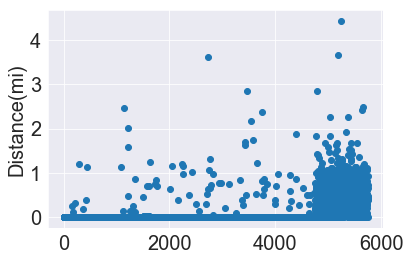

In [40]:
plt.scatter(np.arange(len(df_dallas_tx)), df_dallas_tx['Distance(mi)'].values)
plt.ylabel('Distance(mi)')
plt.show()

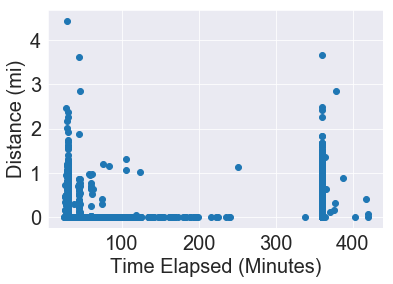

In [41]:
plt.scatter(df_dallas_tx['Time_Elapsed_From_Accident(Minutes)'].values, df_dallas_tx['Distance(mi)'].values)
plt.xlabel('Time Elapsed (Minutes)')
plt.ylabel('Distance (mi)')
plt.show()

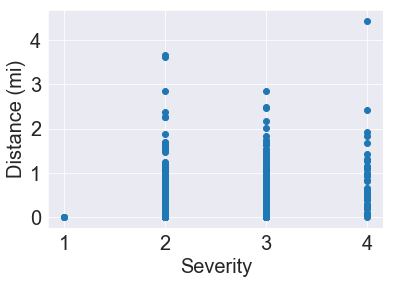

In [42]:
plt.scatter(df_dallas_tx['Severity'].values, df_dallas_tx['Distance(mi)'].values)
plt.xlabel('Severity')
plt.ylabel('Distance (mi)')
plt.show()

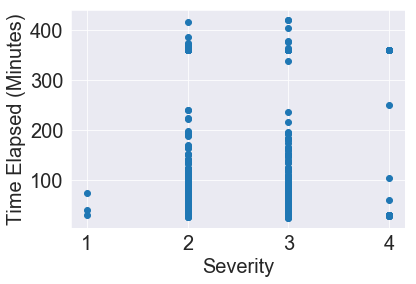

In [43]:
plt.scatter(df_dallas_tx['Severity'].values, df_dallas_tx['Time_Elapsed_From_Accident(Minutes)'].values)
plt.xlabel('Severity')
plt.ylabel('Time Elapsed (Minutes)')
plt.show()

In [44]:
# Regression Models to Predict Distance

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [46]:
feature_columns = ['Severity', 'Latitude', 'Longitude', 'Season', 'Part_Of_Day', 'Start Hour', 'Day Of Week', 'Street', 'County', 'Zipcode',
                'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition',
                'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 
                'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
                'Nautical_Twilight', 'Astronomical_Twilight']
target_col = 'Distance(mi)'
df_dallas_tx_model = df_dallas_tx[feature_columns]
df_dallas_tx_model_dummy = pd.get_dummies(df_dallas_tx_model, drop_first=True)
X = df_dallas_tx_model_dummy
y = df_dallas_tx[target_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [47]:
df_dallas_tx_model_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5749 entries, 25204 to 288530
Columns: 1766 entries, Severity to Astronomical_Twilight_Night
dtypes: float64(6), int64(2), uint8(1758)
memory usage: 10.0 MB


Random Forest Regressor Mean Absolute Error: 0.09299341682518071

Random Forest Regressor Score: 1.0

Top 10 Most Important Features: 

                 Feature  Importance
0               Latitude    0.129088
1              Longitude    0.111855
2           Junction_Yes    0.076026
3               Severity    0.058545
4             Start Hour    0.056303
5            Humidity(%)    0.051604
6           Pressure(in)    0.045956
7         Temperature(F)    0.037211
8         Visibility(mi)    0.020444
9  Street_E Ledbetter Dr    0.017740



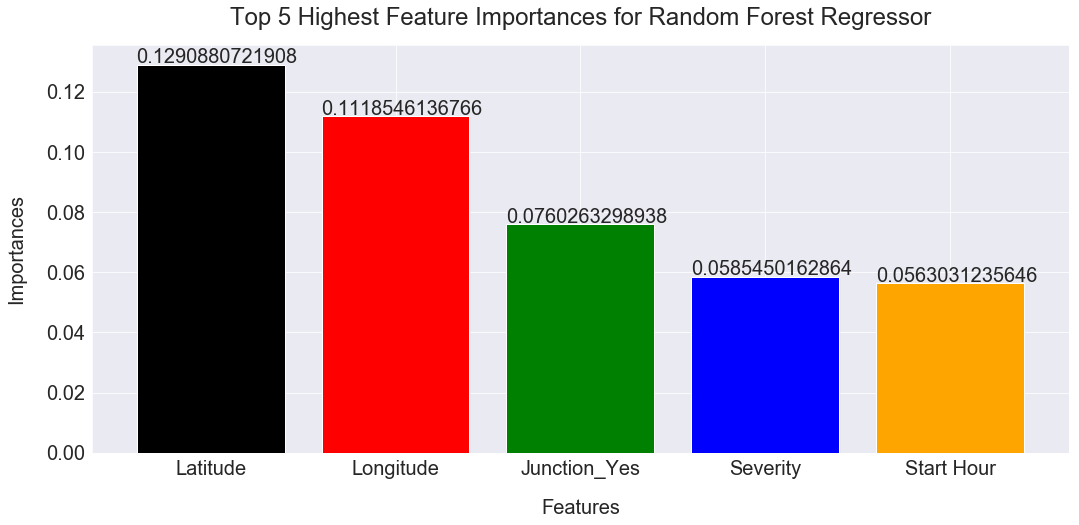

In [48]:
def randomForestRegressorFunction(train_X, test_X, train_y, test_y):
    regressor = RandomForestRegressor(random_state = 0)
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Random Forest Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Random Forest Regressor Score:', regressor.score(test_X, predictions))
    df_feature_importances = pd.DataFrame(regressor.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return regressor, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Random Forest Regressor', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

rf_regressor_regular, feature_importance_rf_df = randomForestRegressorFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_rf_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_rf_df)

Random Forest Regressor With n_estimators = 100 Mean Absolute Error: 0.09262780557796665

Random Forest Regressor With n_estimators = 100 Score: 1.0


Top 10 Most Important Features: 

                 Feature  Importance
0               Latitude    0.142632
1              Longitude    0.093393
2           Junction_Yes    0.072515
3               Severity    0.057574
4             Start Hour    0.055915
5            Humidity(%)    0.045579
6           Pressure(in)    0.045440
7         Temperature(F)    0.045392
8         Visibility(mi)    0.020247
9  Street_E Ledbetter Dr    0.018962



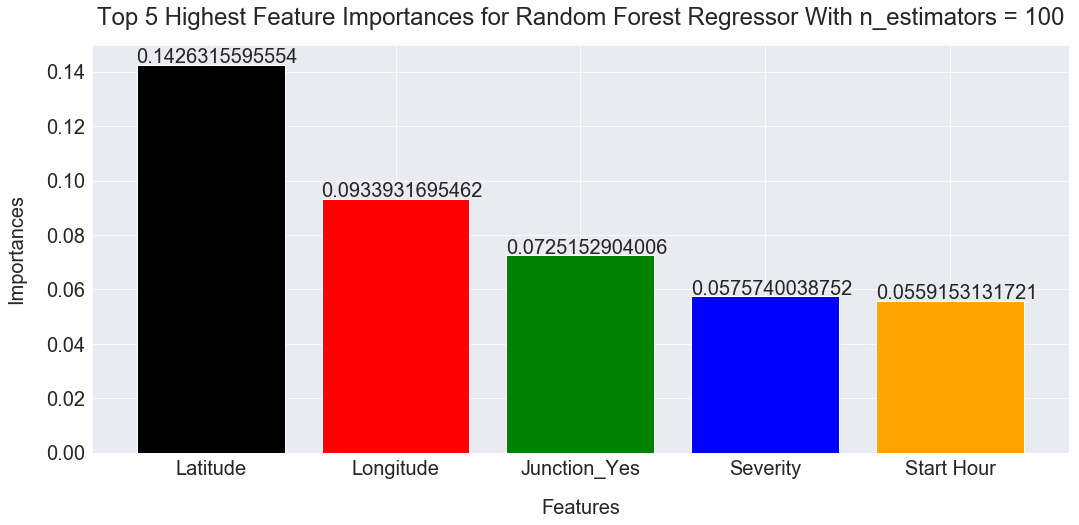

In [49]:
def randomForestRegressorNEstimatorsHundredFunction(train_X, test_X, train_y, test_y):
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Random Forest Regressor With n_estimators = 100 Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Random Forest Regressor With n_estimators = 100 Score:', regressor.score(test_X, predictions))
    print()
    df_feature_importances = pd.DataFrame(regressor.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return regressor, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Random Forest Regressor With n_estimators = 100', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

rf_regressor_hundred, feature_importance_rf_hundred_df = randomForestRegressorNEstimatorsHundredFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_rf_hundred_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_rf_hundred_df)

Decision Tree Regressor Mean Absolute Error: 0.09581507274790316

Decision Tree Regressor Score: 1.0


Top 10 Most Important Features: 

               Feature  Importance
0             Latitude    0.155743
1            Longitude    0.099045
2         Junction_Yes    0.070304
3       Temperature(F)    0.055805
4         Pressure(in)    0.054703
5             Severity    0.052889
6          Humidity(%)    0.048287
7           Start Hour    0.039878
8  Day Of Week_Tuesday    0.030504
9   Zipcode_75204-3101    0.018040



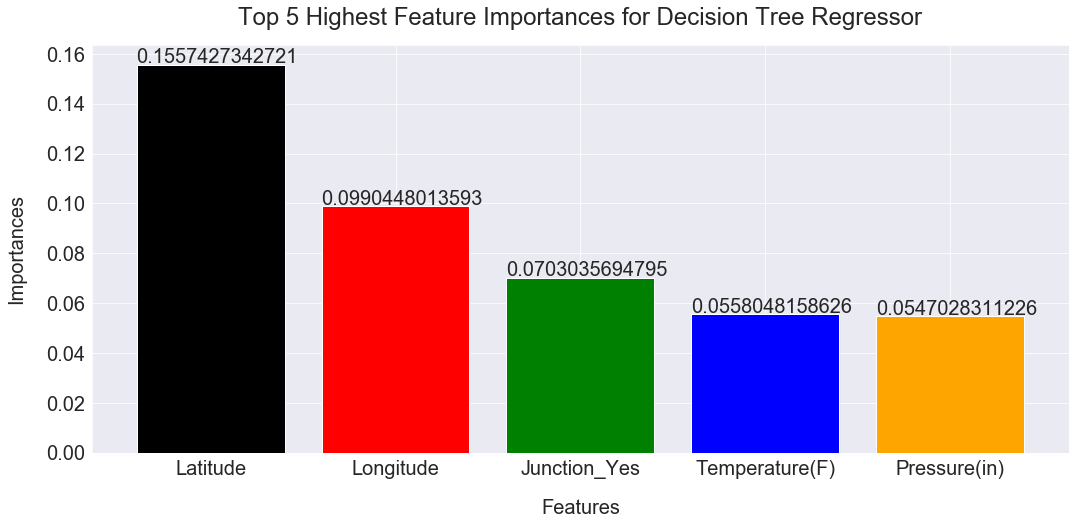

In [50]:
def decisionTreeRegressorFunction(train_X, test_X, train_y, test_y):
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Decision Tree Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Decision Tree Regressor Score:', regressor.score(test_X, predictions))
    print()
    df_feature_importances = pd.DataFrame(regressor.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return regressor, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Decision Tree Regressor', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

dt_regressor,feature_importance_dt_df = decisionTreeRegressorFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_dt_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_dt_df)

In [51]:
def supportVectorRegressorFunction(train_X, test_X, train_y, test_y):
    regressor = SVR(kernel='rbf')
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Support Vector Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Support Vector Regressor Score:', regressor.score(test_X, predictions))
    print()
    return regressor

sv_regressor = supportVectorRegressorFunction(X_train, X_test, y_train, y_test)

Support Vector Regressor Mean Absolute Error: 0.1540098701033788

Support Vector Regressor Score: 1.0



In [52]:
# Predicting a value for Distance

In [53]:
"""
0: Severity
1: Latitude                 
2: Longitude                
3: Season                   
4: Part_Of_Day              
5: Start Hour               
6: Day Of Week              
7: Street                   
8: County                   
9: Zipcode                  
10: Temperature(F)           
11: Humidity(%)              
12: Pressure(in)             
13: Visibility(mi)           
14: Weather_Condition        
15: Amenity                  
16: Bump                     
17: Crossing                 
18: Give_Way                 
19: Junction                 
20: No_Exit                  
21: Railway                  
22: Roundabout               
23: Station                  
24: Stop                     
25: Traffic_Calming          
26: Traffic_Signal           
27: Sunrise_Sunset           
28: Civil_Twilight           
29: Nautical_Twilight        
30: Astronomical_Twilight    
"""

'\n0: Severity\n1: Latitude                 \n2: Longitude                \n3: Season                   \n4: Part_Of_Day              \n5: Start Hour               \n6: Day Of Week              \n7: Street                   \n8: County                   \n9: Zipcode                  \n10: Temperature(F)           \n11: Humidity(%)              \n12: Pressure(in)             \n13: Visibility(mi)           \n14: Weather_Condition        \n15: Amenity                  \n16: Bump                     \n17: Crossing                 \n18: Give_Way                 \n19: Junction                 \n20: No_Exit                  \n21: Railway                  \n22: Roundabout               \n23: Station                  \n24: Stop                     \n25: Traffic_Calming          \n26: Traffic_Signal           \n27: Sunrise_Sunset           \n28: Civil_Twilight           \n29: Nautical_Twilight        \n30: Astronomical_Twilight    \n'

In [54]:
# Adding predicted severity value to values_for_features list
values_for_features.insert(0, severity_prediction)

In [55]:
print(values_for_features)

[3, 32.909061, -96.73221600000001, 'Spring', 'Evening', 17, 'Thursday', 'LBJ Fwy E', 'Dallas', '75243', 82.0, 41.0, 29.78, 10.0, 'Mostly Cloudy', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Day', 'Day', 'Day', 'Day']


In [56]:
a_series = pd.Series(values_for_features, index = df_dallas_tx_model.columns)
df_dallas_tx_model = df_dallas_tx_model.append(a_series, ignore_index=True)
df_dallas_tx_model_dummy = pd.get_dummies(df_dallas_tx_model, drop_first=True)

In [57]:
distance_prediction = rf_regressor_hundred.predict(df_dallas_tx_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Distance Prediction (mi):', distance_prediction)

Distance Prediction (mi): 0.01292060464214092


In [58]:
# Regression Models to Predict Time_Elapsed

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [60]:
feature_columns = ['Distance(mi)', 'Severity', 'Latitude', 'Longitude', 'Season', 'Part_Of_Day', 'Start Hour', 'Day Of Week', 'Street', 'County', 'Zipcode',
                'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition',
                'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 
                'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
                'Nautical_Twilight', 'Astronomical_Twilight']
target_col = 'Time_Elapsed_From_Accident(Minutes)'
df_dallas_tx_model = df_dallas_tx[feature_columns]
df_dallas_tx_model_dummy = pd.get_dummies(df_dallas_tx_model, drop_first=True)
X = df_dallas_tx_model_dummy
y = df_dallas_tx[target_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [61]:
df_dallas_tx_model_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5749 entries, 25204 to 288530
Columns: 1767 entries, Distance(mi) to Astronomical_Twilight_Night
dtypes: float64(7), int64(2), uint8(1758)
memory usage: 10.1 MB


Random Forest Regressor Mean Absolute Error: 34.35408205841446

Random Forest Regressor Score: 1.0

Top 10 Most Important Features: 

                      Feature  Importance
0                Distance(mi)    0.542448
1                Pressure(in)    0.113492
2              Temperature(F)    0.032541
3                    Latitude    0.022136
4                 Humidity(%)    0.018800
5                   Longitude    0.016154
6                  Start Hour    0.015724
7              Street_I-35E N    0.007486
8                    Severity    0.006029
9  Weather_Condition_Overcast    0.004697



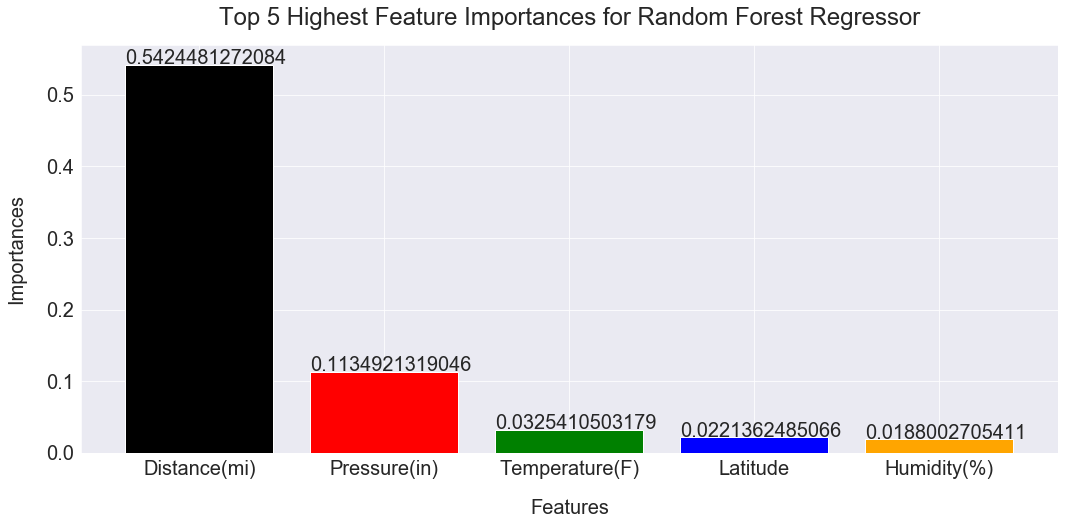

In [62]:
def randomForestRegressorFunction(train_X, test_X, train_y, test_y):
    regressor = RandomForestRegressor(random_state = 0)
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Random Forest Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Random Forest Regressor Score:', regressor.score(test_X, predictions))
    df_feature_importances = pd.DataFrame(regressor.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return regressor, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Random Forest Regressor', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

rf_time_regressor_regular, feature_importance_rf_time_df = randomForestRegressorFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_rf_time_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_rf_time_df)

Random Forest Regressor With n_estimators = 100 Mean Absolute Error: 34.050254983773755

Random Forest Regressor With n_estimators = 100 Score: 1.0


Top 10 Most Important Features: 

          Feature  Importance
0    Distance(mi)    0.528971
1    Pressure(in)    0.106783
2  Temperature(F)    0.034700
3        Latitude    0.026486
4     Humidity(%)    0.020955
5       Longitude    0.020162
6      Start Hour    0.018792
7  Visibility(mi)    0.008983
8        Severity    0.008499
9  Street_I-35E N    0.005257



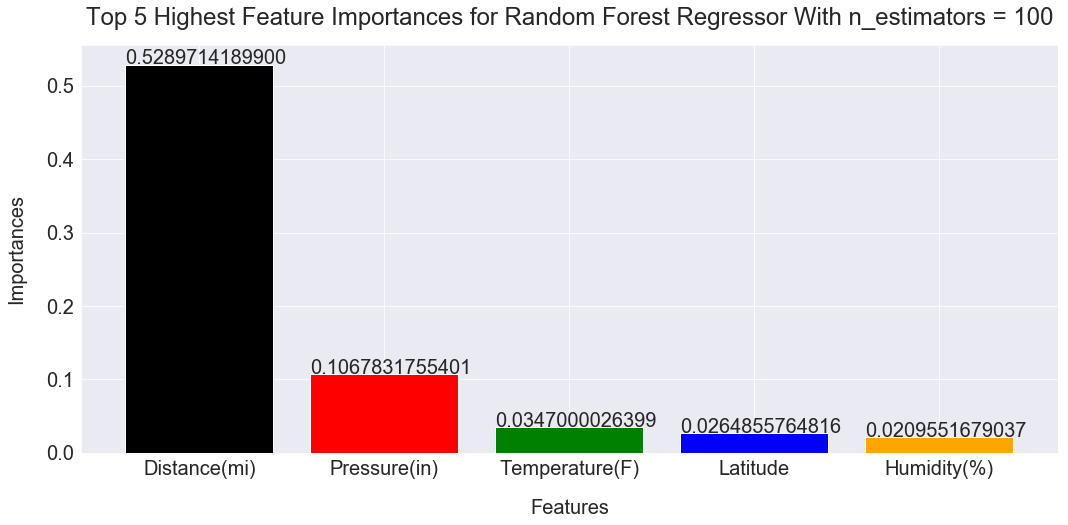

In [63]:
def randomForestRegressorNEstimatorsHundredFunction(train_X, test_X, train_y, test_y):
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Random Forest Regressor With n_estimators = 100 Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Random Forest Regressor With n_estimators = 100 Score:', regressor.score(test_X, predictions))
    print()
    df_feature_importances = pd.DataFrame(regressor.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return regressor, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Random Forest Regressor With n_estimators = 100', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

rf_time_regressor_hundred, feature_importance_rf_time_hundred_df = randomForestRegressorNEstimatorsHundredFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_rf_time_hundred_df.head(10))
print()
createVisualizationFeatureImportances(feature_importance_rf_time_hundred_df)

Decision Tree Regressor Mean Absolute Error: 36.45893602225313

Decision Tree Regressor Score: 1.0


Top 10 Most Important Features: 

          Feature  Importance
0    Distance(mi)    0.534289
1    Pressure(in)    0.109211
2  Temperature(F)    0.037521
3     Humidity(%)    0.027508
4        Latitude    0.024965
5       Longitude    0.018667
6      Start Hour    0.016300
7        Severity    0.011282
8  Street_I-35E N    0.007689
9  Visibility(mi)    0.006831



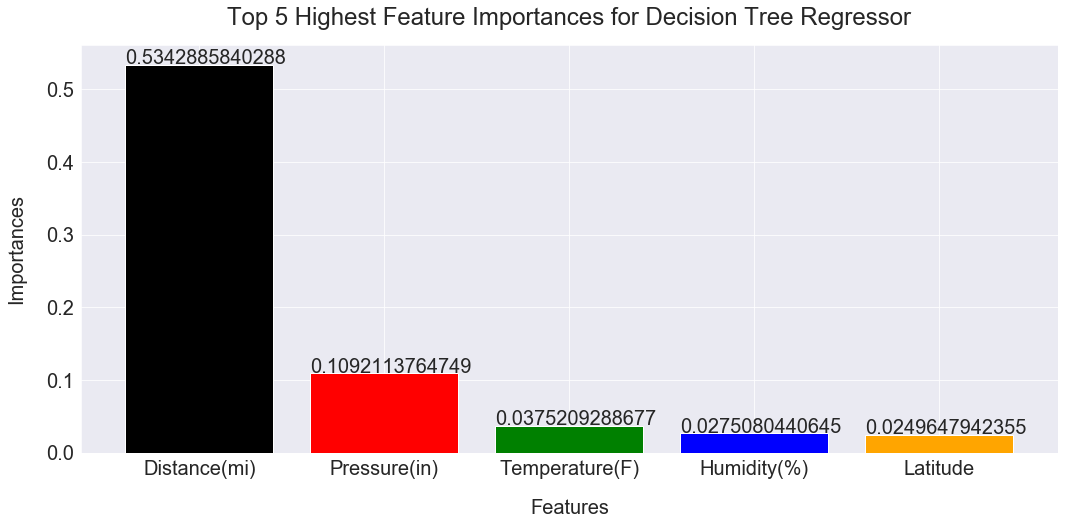

In [64]:
def decisionTreeRegressorFunction(train_X, test_X, train_y, test_y):
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Decision Tree Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Decision Tree Regressor Score:', regressor.score(test_X, predictions))
    print()
    df_feature_importances = pd.DataFrame(regressor.feature_importances_, index = train_X.columns, columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
    df_feature_importances.columns = ['Feature', 'Importance']
    return regressor, df_feature_importances

def createVisualizationFeatureImportances(df):
    bars = plt.bar(x = df.head()['Feature'], height = df.head()['Importance'], color=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange'])
    fig = plt.gcf()
    fig.set_size_inches(17.5, 7.5)
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20)
    plt.xticks(df.head()['Feature'])
    plt.xlabel("Features", labelpad = 20)
    plt.ylabel('Importances', labelpad = 20)
    plt.title('Top 5 Highest Feature Importances for Decision Tree Regressor', pad = 20)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .0005, str(yval)[:15])
    plt.show()
    return None

dt_time_regressor, feature_importance_dt_time = decisionTreeRegressorFunction(X_train, X_test, y_train, y_test)
print()
print('Top 10 Most Important Features: ')
print()
print(feature_importance_dt_time.head(10))
print()
createVisualizationFeatureImportances(feature_importance_dt_time)

In [65]:
def supportVectorRegressorFunction(train_X, test_X, train_y, test_y):
    regressor = SVR(kernel='rbf')
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Support Vector Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Support Vector Regressor Score:', regressor.score(test_X, predictions))
    print()
    return regressor

sv_time_regressor = supportVectorRegressorFunction(X_train, X_test, y_train, y_test)

Support Vector Regressor Mean Absolute Error: 49.241150966531784

Support Vector Regressor Score: 1.0



In [66]:
# Predicting a value for Time_Elapsed

In [67]:
"""
0: Distance(mi)
1: Severity
2: Latitude                 
3: Longitude                
4: Season                   
5: Part_Of_Day              
6: Start Hour               
7: Day Of Week              
8: Street                   
9: County                   
10: Zipcode                  
11: Temperature(F)           
12: Humidity(%)              
13: Pressure(in)             
14: Visibility(mi)           
15: Weather_Condition        
16: Amenity                  
17: Bump                     
18: Crossing                 
19: Give_Way                 
20: Junction                 
21: No_Exit                  
22: Railway                  
23: Roundabout               
24: Station                  
25: Stop                     
26: Traffic_Calming          
27: Traffic_Signal           
28: Sunrise_Sunset           
29: Civil_Twilight           
30: Nautical_Twilight        
31: Astronomical_Twilight    
"""

'\n0: Distance(mi)\n1: Severity\n2: Latitude                 \n3: Longitude                \n4: Season                   \n5: Part_Of_Day              \n6: Start Hour               \n7: Day Of Week              \n8: Street                   \n9: County                   \n10: Zipcode                  \n11: Temperature(F)           \n12: Humidity(%)              \n13: Pressure(in)             \n14: Visibility(mi)           \n15: Weather_Condition        \n16: Amenity                  \n17: Bump                     \n18: Crossing                 \n19: Give_Way                 \n20: Junction                 \n21: No_Exit                  \n22: Railway                  \n23: Roundabout               \n24: Station                  \n25: Stop                     \n26: Traffic_Calming          \n27: Traffic_Signal           \n28: Sunrise_Sunset           \n29: Civil_Twilight           \n30: Nautical_Twilight        \n31: Astronomical_Twilight    \n'

In [68]:
# Adding predicted distance value to values_for_features list
values_for_features.insert(0, distance_prediction)

In [69]:
print(values_for_features)

[0.01292060464214092, 3, 32.909061, -96.73221600000001, 'Spring', 'Evening', 17, 'Thursday', 'LBJ Fwy E', 'Dallas', '75243', 82.0, 41.0, 29.78, 10.0, 'Mostly Cloudy', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Day', 'Day', 'Day', 'Day']


In [70]:
a_series = pd.Series(values_for_features, index = df_dallas_tx_model.columns)
df_dallas_tx_model = df_dallas_tx_model.append(a_series, ignore_index=True)
df_dallas_tx_model_dummy = pd.get_dummies(df_dallas_tx_model, drop_first=True)

In [71]:
time_elapsed_prediction = rf_time_regressor_hundred.predict(df_dallas_tx_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Time Elapsed Prediction (Minutes):', time_elapsed_prediction)

Time Elapsed Prediction (Minutes): 32.84066666666667
